# KNN-Classifier

In [1]:
import mglearn as mg
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


/home/lucifer/ed/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


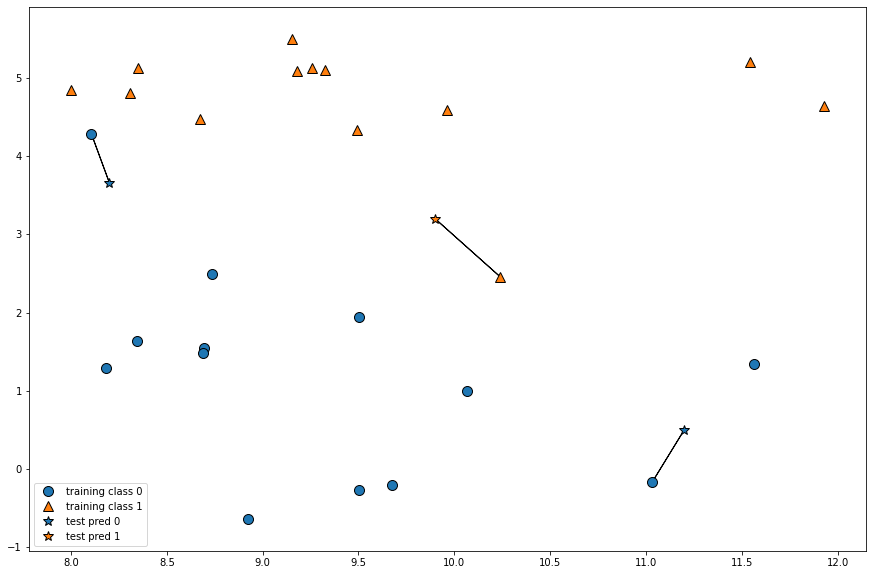

In [2]:
plt.figure(figsize=(15,10))
mg.plots.plot_knn_classification(n_neighbors=1)

/home/lucifer/ed/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


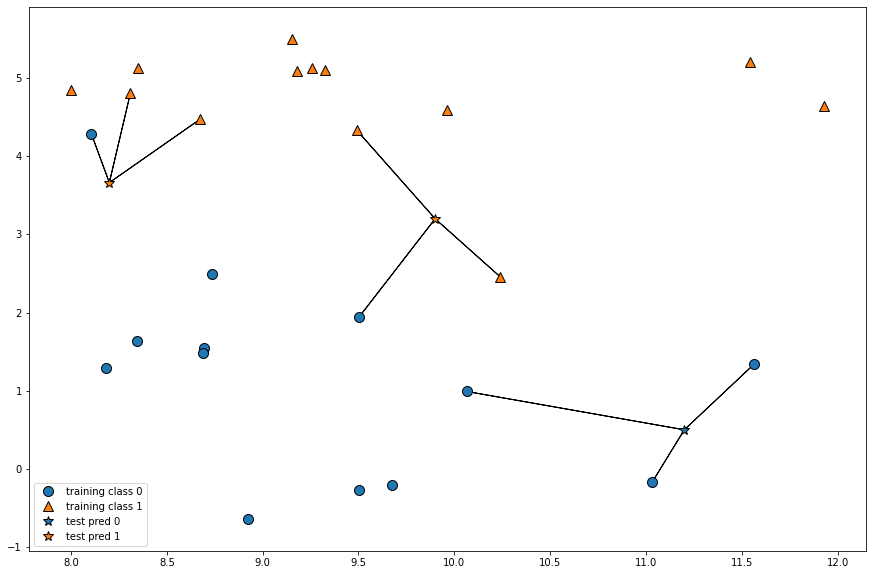

In [3]:
plt.figure(figsize=(15,10))
mg.plots.plot_knn_classification(n_neighbors=3)

In [4]:
X, y = mg.datasets.make_forge()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, random_state = 0)
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(Xtrain,ytrain)
print("Test set prediction: {}".format(clf.predict(Xtest)))
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set prediction: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


/home/lucifer/ed/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


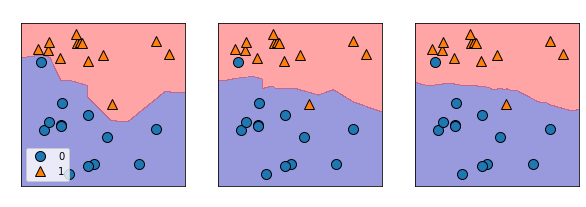

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = sk.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha = .4)
    mg.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors), color='w')
    ax.set_xlabel("feature 0", color='w')
    ax.set_ylabel("feature 1",color='w')
axes[0].legend(loc=3)

### Real-World Dataset

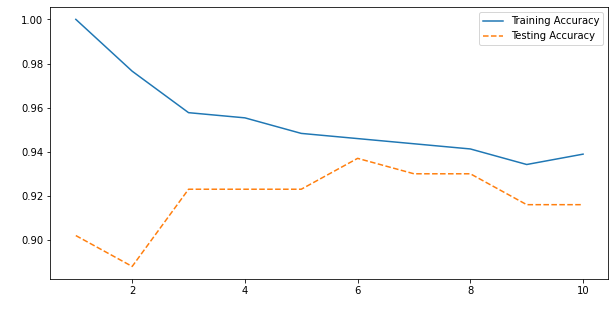

In [11]:
cancer_dataset = sk.datasets.load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(cancer_dataset.data, cancer_dataset.target, stratify=cancer_dataset.target, random_state=66)

training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = sk.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, ytrain)
    training_accuracy.append(clf.score(Xtrain, ytrain))
    testing_accuracy.append(clf.score(Xtest, ytest))

plt.figure(figsize=(10, 5))
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, testing_accuracy, '--',label='Testing Accuracy')
plt.ylabel("Accuracy", color="w")
plt.xlabel("Neighbors", color="w")
plt.legend()

# KNN-Regressor

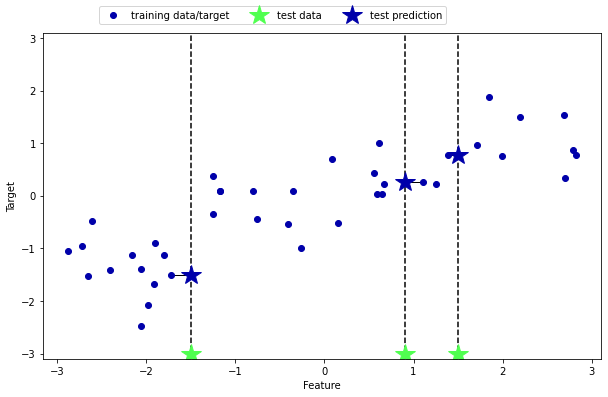

In [12]:
mg.plots.plot_knn_regression(n_neighbors=1)

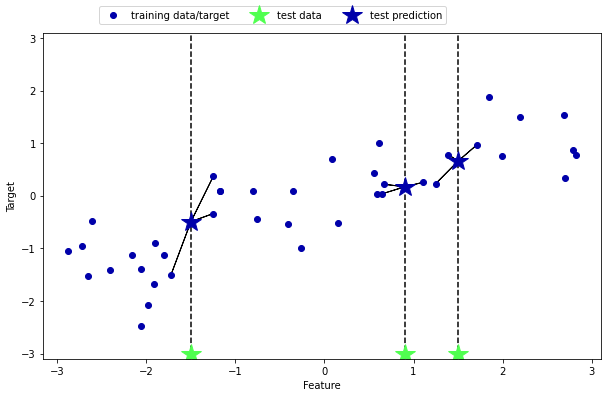

In [13]:
mg.plots.plot_knn_regression(n_neighbors=3)

In [15]:
X, y = mg.datasets.make_wave(n_samples = 40)
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, random_state = 0)
reg = sk.neighbors.KNeighborsRegressor(n_neighbors=3)
reg.fit(Xtrain, ytrain)
print("Prediction for Xtest: {}".format(reg.predict(Xtest)))
print("R^2 for Xtest: {:.2f}".format(reg.score(Xtest,ytest)))

Prediction for Xtest: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 for Xtest: 0.83


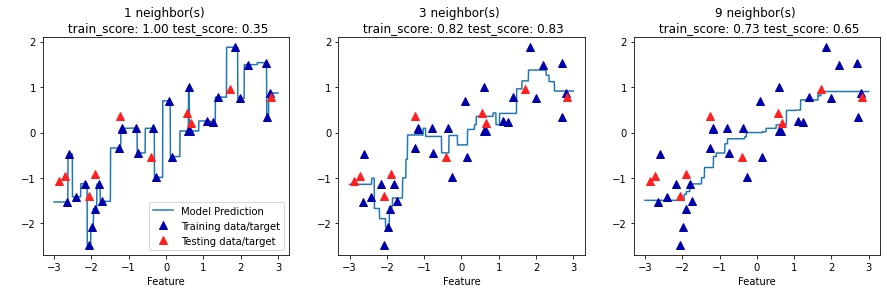

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = sk.neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(Xtrain, ytrain)
    ax.plot(line, reg.predict(line))
    ax.plot(Xtrain, ytrain, '^', c=mg.cm2(0), markersize=8)
    ax.plot(Xtest, ytest, '^', c=mg.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s) \n train_score: {:.2f} test_score: {:.2f}".format(n_neighbors, reg.score(Xtrain, ytrain), reg.score(Xtest, ytest)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target", color="w")
axes[0].legend(["Model Prediction", "Training data/target", "Testing data/target"])